In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.21.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.1 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


**Number of Sentences and Words before Pre-processing**

In [3]:
import pandas as pd

# Load the CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/NLP4PLE/NLP_Journal_Final.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Display basic information about the file and a preview of the first few rows
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Authors       825 non-null    object
 1   Title         825 non-null    object
 2   Year          825 non-null    int64 
 3   Journal       825 non-null    object
 4   Abstract      825 non-null    object
 5   Link          825 non-null    object
 6   Affiliations  825 non-null    object
dtypes: int64(1), object(6)
memory usage: 45.2+ KB


(None,
                                              Authors  \
 0  Huang Y.-M.; Liu M.-C.; Chen N.-S.; Kinshuk; W...   
 1                                          Toyoda E.   
 2                            McDonald J.; Loke S.-K.   
 3                                           Cheng G.   
 4                                            Bond M.   
 
                                                Title  Year  \
 0  Facilitating learners' web-based information p...  2014   
 1  Evaluation of computerised reading-assistance ...  2016   
 2  Discursive constructions of teacher in an educ...  2016   
 3  Towards an automatic classification system for...  2017   
 4  Helping doctoral students crack the publicatio...  2018   
 
                                           Journal  \
 0  Australasian Journal of Educational Technology   
 1  Australasian Journal of Educational Technology   
 2  Australasian Journal of Educational Technology   
 3  Australasian Journal of Educational Technology   

In [4]:
pip install nltk

In [5]:
import nltk
nltk.download('punkt')

from nltk.tokenize import sent_tokenize, word_tokenize

# Tokenize the abstracts into sentences and words to facilitate the counting
data['sentence_count'] = data['Abstract'].apply(lambda x: len(sent_tokenize(x)))
data['word_count'] = data['Abstract'].apply(lambda x: len(word_tokenize(x)))

# Calculate the total number of sentences and words
total_sentences = data['sentence_count'].sum()
total_words = data['word_count'].sum()

# Calculate the average number of words and sentences per row
average_words_per_row = total_words / len(data)
average_sentences_per_row = total_sentences / len(data)

total_sentences, total_words, average_words_per_row, average_sentences_per_row

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


(8100, 199559, 241.88969696969696, 9.818181818181818)

The data contains 825 entries.

*   Total number of sentences: 8,100
*   Total number of words: 199,559
*   Average number of words per abstract: 241.89
*   Average number of sentences per abstract: 9.82

# **Data Pre-processing**

We removed special characters, lemmatization, dropping empty rows, removing duplicates and established the settings for sentiment analysis, custom stopwords, and text preprocessing with NLTK.

In [6]:
import pandas as pd
import spacy
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer  # Import VADER sentiment analyzer
import nltk

# Ensure necessary NLTK resources are downloaded
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')  # Download the VADER lexicon

# Load Spacy English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Custom stopwords list grouped by categories
custom_stopwords = [

    # research stopwords
    'add', 'grant', 'use', 'study', 'research', 'objective', 'aim', 'method', 'approach',
    'results', 'revealed', 'findings', 'conclusion', 'analysis', 'data', 'significant', 'impact',
    'discussion', 'participants', 'subject', 'variables', 'hypothesis', 'population',
    'sample', 'literature', 'review', 'framework', 'theory', 'experiment', 'survey',
    'evaluation', 'assessment', 'implications', 'measure', 'different', 'digital',
    'instrument', 'validity', 'reliability', 'can', 'could', 'will', 'would', 'shall',
    'should', 'may', 'might', 'are', 'is', 'am', 'was', 'were', 'is', 'technology', '40',
    '2023', 'limited', 'express', 'computer', 'computers', 'internet', 'Internet',
    'environment', 'performance', 'behavior', 'communication', 'human', 'international',

    # topic stopwords
    'natural', 'language', 'processing', 'text', 'word',

    # education stopwords
    'aims', 'analyses','learning', 'learners', 'students', 'education', 'model', 'system', 'paper',
    'knowledge', 'information', 'methods', 'proposed', 'teaching',
    'educational', 'new', 'student', 'studies', 'development', 'provide', 'however',
    'learner', 'online', 'academic', 'faculty', 'course', 'design', 'group', 'support',
    'implication', '2022', 'skill', 'effect', 'process', 'activity', 'potential', 'pedagogical',

    # numerical stopwords
    'one', 'two', 'three', 'four', 'english', 'first', 'second', 'third', 'zero',
    'multiple', 'additional', 'various', 'each', 'among', 'within', 'between', 'de', 'licence',
    '40', '143', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',

    # general stopwords
    'context', 'perspective', 'concept', 'practice', 'experience', 'skills',
    'goals', 'objectives', 'outcomes', 'problems', 'questions', 'inquiries',
    'investigations', 'studies', 'analyses', 'ass', 'assessments', 'evaluations', 'reviews', 'surveys',
    'experiments', 'tests', 'trials', 'exercises', 'demonstrations', 'exemplars', 'cases',
    'instances', 'examples', 'illustrations', 'representations', 'accounts', 'reports',
    'descriptions', 'explanations', 'interpretations', 'arguments', 'defenses', 'advocacies', 'critiques',
    'reflections', 'contemplations', 'meditations', 'ruminations', 'deliberations', 'discussions',
    'conversations', 'dialogues', 'debates', 'exchanges', 'interactions', 'communications', 'transmissions',
    'disseminations', 'broadcasts', 'publications', 'presentations', 'performances', 'exhibitions',
    'displays', 'showcases', 'manifestations', 'expressions', 'articulations', 'formulations',
    'elaborations', 'expansions', 'extensions', 'academics', 'scientists', 'investigators', 'analysts',
    'evaluators', 'reviewers', 'auditors', 'assessors', 'inspectors', 'examiners', 'testers', 'monitors',
    'observers', 'witnesses', 'reporters', 'commentators', 'critics', 'editors', 'authors', 'writers',
    'organizations', 'institutions', 'associations', 'societies', 'clubs', 'circles', 'movements',
    'campaigns', 'initiatives', 'projects', 'programs', 'plans', 'pursuits', 'missions', 'visions',
    'targets', 'aims', 'purposes', 'intentions', 'aspirations', 'ambitions', 'article', 'journal',
    'user', 'wa', 'ajet', 'using', 'british', 'ha', 'used', 'author', 'ltd', 'elsevier',
    'taylor', 'francis', 'ut', 'la', 'son', 'john', 'wiley', 'inc', 'finding', 'may', 'should', 'can', 'might',
    'also', 'based', 'cc', 'byncnd', 'informa', 'uk', 'trading', 'exclusive', 'reserved', 'related',
    'condition', 'collected', 'pattern', 'year', 'intervention', 'common', 'copyright', '2021',
    'structural', 'equation', 'noncommercial', 'retain', 'springer', 'way', 'high', 'issue', 'significantly',
    'class', 'effectiveness', 'educator', 'difference', 'developed', 'thinking', 'training', 'instructional',
    'type', 'influence', 'focus', 'better', 'feature', 'ability', 'sciencebusiness', 'andor', 'already',
    'known', 'publication', 'often', 'number', 'increasing', 'current', 'large', 'increasingly', 'become',
    'content', 'school', 'participant', 'part', 'university', 'task', 'need', 'application', 'nature', 'work',
    'present', 'strategy', 'association', 'outcome', 'found', 'understanding', 'perceived', 'time', 'llc',
    'show', 'factor', 'test', 'problem', 'showed', 'important', 'well', 'conducted',
    'revealed', 'result', 'level', 'australasian', 'experimental', 'topic', 'term', 'perception', 'question',
    'case', 'researcher', 'epress', 'ai', 'right', 'common', 'entire', 'step', 'published', 'note', '20082011', 'ieee',
    'wpal', 'l2', 'l1', '12', 'error', 'discus','learn','given', 'including', 'higher', 'specifically', 'find', 'offer',

 # Additional stopwords by categories
    # Research Stopwords
    'methodology', 'analysis', 'findings', 'conclusions', 'discussion', 'participants', 'variables',
    'hypothesis', 'population', 'sample', 'literature', 'review', 'framework', 'theory', 'experiment',
    'survey', 'evaluation', 'assessment', 'implications', 'measure', 'instrument', 'validity',
    'reliability', 'technology', 'internet', 'environment', 'performance', 'behavior', 'communication',
    'human',

    # Education Stopwords
    'model', 'system', 'paper', 'knowledge', 'information', 'methods', 'proposed', 'teaching',
    'educational', 'student', 'studies', 'development', 'learner', 'online', 'academic', 'faculty',
    'course', 'design', 'group', 'support', 'implication', 'skill', 'effect', 'process', 'activity',
    'potential', 'pedagogical', 'language',

    # Numerical Stopwords
    'one', 'two', 'three', 'four', 'english', 'first', 'second', 'third', 'zero', 'multiple',
    'additional', 'various', 'each', 'among', 'within', 'between',

    # General Stopwords
    'context', 'perspective', 'concept', 'practice', 'experience', 'goals', 'objectives', 'outcomes',
    'problems', 'questions', 'inquiries', 'investigations', 'studies', 'analyses', 'ass', 'assessments',
    'evaluations', 'reviews', 'surveys', 'experiments', 'tests', 'trials', 'exercises', 'demonstrations',
    'exemplars', 'cases', 'instances', 'examples', 'illustrations', 'representations', 'accounts', 'reports',
    'descriptions', 'explanations', 'interpretations', 'arguments', 'defenses', 'advocacies', 'critiques',
    'reflections', 'contemplations', 'meditations', 'ruminations', 'deliberations', 'discussions',
    'conversations', 'dialogues', 'debates', 'exchanges', 'interactions', 'communications', 'transmissions',
    'disseminations', 'broadcasts', 'publications', 'presentations', 'performances', 'exhibitions', 'displays',
    'showcases', 'manifestations', 'expressions', 'articulations', 'formulations', 'elaborations', 'expansions',
    'extensions', 'academics', 'scientists', 'investigators', 'analysts', 'evaluators', 'reviewers', 'auditors',
    'assessors', 'inspectors', 'examiners', 'testers', 'monitors', 'observers', 'witnesses', 'reporters',
    'commentators', 'critics', 'editors', 'authors', 'writers', 'organizations', 'institutions', 'associations',
    'societies', 'clubs', 'circles', 'movements', 'campaigns', 'initiatives', 'projects', 'programs', 'plans',
    'pursuits', 'missions', 'visions', 'targets', 'aims', 'purposes', 'intentions', 'aspirations', 'ambitions',
    'article', 'journal', 'user', 'wa', 'ajet', 'using', 'british', 'ha', 'used', 'author', 'ltd', 'elsevier',
    'taylor', 'francis', 'ut', 'la', 'son', 'john', 'wiley', 'inc', 'finding', 'may', 'should', 'can', 'might',
    'also', 'based', 'cc', 'byncnd', 'informa', 'uk', 'trading', 'exclusive', 'reserved', 'related', 'condition',
    'collected', 'pattern', 'year', 'intervention', 'common', 'copyright', '2021', 'structural', 'equation',
    'noncommercial', 'retain', 'springer', 'way', 'high', 'issue', 'significantly', 'class', 'effectiveness',
    'educator', 'difference', 'developed', 'thinking', 'training', 'instructional', 'type', 'influence', 'focus',
    'better', 'feature', 'ability', 'sciencebusiness', 'andor', 'already', 'known', 'publication', 'often',
    'number', 'increasing', 'current', 'large', 'increasingly', 'become', 'content', 'school', 'participant',
    'part', 'university', 'task', 'need', 'application', 'nature', 'work', 'present', 'strategy', 'association',
    'outcome', 'found', 'understanding', 'perceived', 'time', 'llc', 'show', 'factor', 'test', 'problem',
    'showed', 'artificial', 'intelligence', 'important', 'well', 'conducted', 'revealed', 'result', 'level',
    'australasian', 'experimental', 'topic', 'term', 'perception', 'question', 'case', 'researcher', 'epress',
    'ai', 'right', 'common', 'although', 'evaluated', 'main', 'theoretical', 'tool', 'medium', 'quality', 'future',
    'prior', 'tool', 'medium','datum', 'base','include', 'elsevi',

    # Additional
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers',
    'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should',
    'come','may',
    "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't",
    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
    'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't",
    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't","go","topic","share","go","dear",
    "module","look","time","topic","experiance",'use', 'used', 'using', 'also', 'study', 'research', 'objective',
    'aim', 'method', 'approach','hi','results', 'findings', 'conclusion', 'analysis', 'data', 'significant', 'impact',
    'could','become', 'discussion', 'participants', 'subject', 'variables', 'hypothesis', 'population','hello',
    'sample', 'literature', 'review', 'framework', 'theory', 'experiment', 'survey','discussionhi','discussionhello',
    'evaluation', 'assessment', 'implications', 'qualitative', 'quantitative', 'measure','interested','name','course',
    'something','see','understand','interested','social','us', 'instrument', 'validity', 'reliability','agree',
    'people', 'think', 'true', 'good', 'work', 'different', 'important', 'sometimes','working','never','take','better',
    'way', 'feel', 'like', 'need', 'life', "don't", 'person','just','dont','say','yes','make','great','person','thing',
    'learn','name','community', 'learning', 'learners', 'students', 'education', 'model', 'using', 'system', 'based',
    'paper','one','give','get', 'keep','give','even','find','issue' 'knowledge', 'teacher', 'teachers', 'teaching',
    'information', 'methods', 'different', 'proposed','discussioni', 'always',
    'educational', 'new', 'student', 'studies', 'development', 'provide', 'however','really','make','group','self','area',
    'improve', 'learner', 'online', 'academic', 'faculty','takeaway','night','point','know','want','well','live','ally',
    'family','bring','get'
    'one', 'two', 'three', 'four', 'english', 'first', 'second', 'third', 'zero','others','would','help','im','hi','iam',
    'much','many','thank','never'
    'multiple', 'additional', 'various', 'each', 'among', 'within', 'between', 'de','able','lot','may','come',
    'propose', 'develop', 'identify', 'write', 'score', 'field', 'examine', 'evaluate', 'increase', 'explore', 'investigate',

    # Common Verbs for Abstract
    'analyze', 'assess', 'compare', 'conclude', 'consider', 'construct', 'critique', 'define', 'demonstrate', 'describe',
    'determine', 'develop', 'discuss', 'discover', 'elaborate', 'evaluate', 'examine', 'explore', 'express', 'identify',
    'illustrate', 'indicate', 'infer', 'investigate', 'justify', 'observe', 'outline', 'present', 'propose', 'prove', 'question',
    'reason', 'recommend', 'reflect', 'regard', 'relate', 'report', 'represent', 'reveal', 'review', 'specify', 'state', 'study',
    'suggest', 'summarize', 'support', 'synthesize', 'theorize', 'validate', 'verify', 'absence', 'meet', 'merely', 'abandonment',
    'ab', 'pubmed', 'interest', 'focused', 'meet', 'abstract', 'north', 'nontaxonomic', 'introductory', 'manner', 'abilities', 'abc',
    'abbreviate', 'million', 'abovementioned', 'major', 'mention', 'ablation', 'abstraction', 'modify', 'achieve', 'passage', 'link',
    'accelerate', 'notably', 'academically', 'specific', 'interview', 'accord', 'matter', 'analyze', 'assess', 'compare', 'conclude',
    'consider', 'construct', 'critique', 'define', 'demonstrate', 'describe', 'determine', 'develop', 'discuss',
    'discover', 'elaborate', 'evaluate', 'examine', 'explore', 'express', 'identify', 'illustrate', 'indicate', 'infer', 'investigate',
    'justify', 'observe', 'outline', 'present', 'propose', 'prove', 'question', 'reason', 'recommend', 'reflect', 'regard', 'relate',
    'report', 'represent', 'reveal', 'review', 'specify', 'state', 'study', 'suggest', 'summarize', 'support', 'synthesize', 'theorize',
    'validate', 'verify', 'abstract', 'north', 'nontaxonomic', 'introductory', 'manner', 'abilities', 'abc', 'abbreviate', 'million',
    'abovementioned', 'major', 'mention', 'ablation', 'abstraction', 'modify', 'achieve', 'passage', 'link', 'accelerate', 'notably',
    'academically', 'specific', 'interview', 'accord', 'matter', 'analyze', 'assess', 'compare', 'conclude', 'consider', 'construct',
    'critique', 'define', 'demonstrate', 'describe', 'determine', 'develop', 'discuss', 'discover', 'elaborate', 'evaluate', 'examine',
    'explore', 'express', 'identify', 'illustrate', 'indicate', 'infer', 'investigate', 'justify', 'observe', 'outline', 'present',
    'propose', 'prove', 'question', 'reason', 'recommend', 'reflect', 'regard', 'relate', 'report', 'represent', 'reveal', 'review',
    'specify', 'state', 'study', 'suggest', 'summarize', 'support', 'synthesize', 'theorize', 'validate', 'verify', 'xlnetbase',
    'individualise', 'acceptable', 'driving', 'abdul', 'minho', 'mine', 'mandatory', 'opinion', 'acquire', 'play', 'account', 'humor',
    'interact', 'interaction', 'technique', 'conduct', 'generate', 'west', 'east', 'north', 'south', 'nao', 'min', 'max', 'popular',
    'address', 'lead', 'hold', 'source', 'apply', 'dataset', 'publish', 'require', 'sons', 'bangla', 'obtain', 'provide',
    'feature', 'search', 'answer', 'user', 'post', 'negative',

    'review', 'framework', 'theory', 'methodology', 'approach', 'findings', 'background',
    'introduction', 'discussion', 'conclusion', 'paper', 'article', 'journal', 'publication',
    'objective', 'aim', 'goal', 'hypothesis', 'variable', 'sample', 'participant', 'respondent',
    'method', 'technique', 'procedure', 'data collection', 'analysis', 'result', 'finding',
    'evidence', 'discussion', 'implication', 'future work', 'limitation', 'challenge', 'opportunity',
    'practice', 'practical', 'theoretical', 'significance', 'contribution', 'review', 'survey',
    'assessment', 'evaluation', 'feedback', 'response', 'interaction', 'engagement', 'involvement',
    'participation', 'performance', 'outcome', 'output', 'impact', 'effect', 'benefit', 'advantage',
    'disadvantage', 'difficulty', 'barrier', 'obstacle', 'issue', 'problem', 'solution', 'strategy',
    'recommendation', 'suggestion', 'advice',

    'abstract', 'study', 'research', 'purpose', 'method', 'results', 'conclusion', 'findings',
    'background', 'objective', 'aims', 'approach', 'methods', 'conclusions', 'implications',
    'keywords', 'introduction', 'literature review', 'theoretical framework', 'data collection',
    'analysis', 'discussion', 'limitations', 'future work', 'implications', 'significance',
    'investigation', 'survey', 'questionnaire', 'interview', 'analysis', 'assessment',
    'evaluation', 'review', 'case study', 'experiment', 'empirical', 'qualitative', 'quantitative',
    'outcome', 'impact', 'effectiveness', 'efficacy', 'performance', 'utilization', 'adoption',
    'integration', 'application', 'challenges', 'issues', 'barriers', 'opportunities', 'prospects',
    'trends', 'advancements', 'innovations', 'technologies', 'tools', 'systems', 'solutions',
    'strategies', 'recommendations', 'evidence', 'contributions', 'understanding', 'insights',
    'perspectives', 'contexts', 'frameworks', 'models', 'theories', 'practices', 'experiences',
    'lessons', 'learnings', 'reflections', 'considerations', 'discussions', 'analyses',
    'narratives', 'reports', 'reviews', 'summaries', 'overviews', 'introductions', 'conclusions',
    'appendices', 'acknowledgments', 'references', 'keywords', 'authors', 'affiliations',

    'whether', 'ahead', 'long', 'via', 'moreover', 'mostly',
    'thus', 'therefore', 'hence', 'whereas', 'whilst', 'amongst', 'nonetheless', 'notwithstanding',
    'herein', 'hereafter', 'hereby', 'therein', 'thereafter', 'thereby', 'herewith', 'therewith',
    'aforementioned', 'hereupon', 'thereto', 'whereupon', 'wherein', 'wherewith', 'albeit',
    'notwithstanding', 'whereby', 'wherewithal', 'thusly', 'therewithal', 'hereinbefore',
    'hereinafter', 'inasmuch', 'wherefore', 'whence', 'hitherto', 'hereunto',

    'moreover', 'mostly', 'key', 'lower', 'shift', 'wilks', 'higher', 'adding', 'impossible',
    'harness', 'inform', 'named',

    'whether', 'ahead', 'long', 'via', 'moreover', 'mostly', 'key', 'lower', 'shift', 'wilks',
    'higher', 'adding', 'impossible', 'harness', 'inform', 'named',

    'thus', 'therefore', 'hence', 'whereas', 'whilst', 'amongst', 'nonetheless', 'notwithstanding',
    'herein', 'hereafter', 'hereby', 'therein', 'thereafter', 'thereby', 'herewith', 'therewith',
    'aforementioned', 'hereupon', 'thereto', 'whereupon', 'wherein', 'wherewith', 'albeit',
    'notwithstanding', 'whereby', 'wherewithal', 'thusly', 'therewithal', 'hereinbefore',
    'hereinafter', 'inasmuch', 'wherefore', 'whence', 'hitherto', 'hereunto',

    'although', 'receiving', 'indicates', 'teach', 'ofthat', 'gain', 'ready', 'adjacent', 'following',

    'predict', 'namely', 'revised', 'presented', 'facet',

    'fill', 'gap', 'including', 'behalf', 'ct', 'cps', 'moocs', 'chatbots',
    'without', 'indicating', 'informing', 'numerous', 'site',

]

# Combine NLTK and custom stopwords
nltk_stopwords = set(stopwords.words('english'))
all_stopwords = nltk_stopwords.union(set(custom_stopwords))

# Function to preprocess and lemmatize text
def preprocess_and_lemmatize(text):
    # Lemmatization with Spacy
    doc = nlp(text.lower())  # Convert text to lowercase
    lemmatized_tokens = [token.lemma_ for token in doc if token.text not in all_stopwords and not token.is_punct and not token.is_stop and token.text.strip() != '']

    return ' '.join(lemmatized_tokens)

# Read the CSV File
file_path = '/content/drive/MyDrive/Colab Notebooks/NLP4PLE/NLP_Journal_Final.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Text Preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Lemmatization
    lemmatizer = WordNetLemmatizer()  # Ensure this is correctly referenced after import
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Remove stopwords
    filtered_tokens = [token for token in lemmatized_tokens if token not in all_stopwords and len(token) > 1]  # Add length check
    # Reconstruct the text
    return ' '.join(filtered_tokens)

# Keep only English alphabets in the 'Abstract' column and remove special characters
data['Abstract'] = data['Abstract'].str.replace('[^a-zA-Z\s]', '', regex=True)

# Drop duplicates and rows where the 'Abstract' column is empty
data.drop_duplicates(subset=['Abstract'], inplace=True)
data = data[data['Abstract'].str.strip().astype(bool)]

data['clean_abstract'] = data['Abstract'].apply(preprocess_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


**Number of Sentences and Words after Pre-processing**

In [7]:
# Calculate the number of words in the cleaned abstracts for each row
data['word_count'] = data['clean_abstract'].apply(lambda x: len(x.split()))

# Calculate the total number of words across all cleaned abstracts
total_word_count = data['word_count'].sum()

print("Total number of words in cleaned abstracts:", total_word_count)

Total number of words in cleaned abstracts: 56525


# **Term Frequency & Term Frequency-Inverse Document Frequency**

In [8]:
pip install scikit-learn

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd

# Initialize CountVectorizer and TfidfVectorizer
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Calculate TF and TF-IDF matrices
tf_matrix = count_vectorizer.fit_transform(data['clean_abstract'])
tfidf_matrix = tfidf_vectorizer.fit_transform(data['clean_abstract'])

# Convert matrices to DataFrames for easier manipulation
tf_df = pd.DataFrame(tf_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Summing up the term frequencies across all documents for TF
tf_sum = tf_df.sum().sort_values(ascending=False).head(25)

# Summing up the TF-IDF scores across all documents for TF-IDF
tfidf_sum = tfidf_df.sum().sort_values(ascending=False).head(25)

# Convert Series to DataFrame for a better table format
top_tf = pd.DataFrame(tf_sum, columns=['TF']).reset_index().rename(columns={'index': 'Term'})
top_tfidf = pd.DataFrame(tfidf_sum, columns=['TF-IDF']).reset_index().rename(columns={'index': 'Term'})

# Displaying the top 25 terms based on TF and TF-IDF
print("Top 25 terms based on Term Frequency (TF):")
print(top_tf)
print("\nTop 25 terms based on TF-IDF:")
print(top_tfidf)

Top 25 terms based on Term Frequency (TF):
            Term   TF
0      cognitive  231
1        writing  230
2        machine  199
3           role  172
4      automated  170
5          agent  165
6        network  156
7           peer  151
8       positive  150
9   relationship  149
10          game  148
11       science  147
12    individual  146
13       emotion  146
14   intelligent  144
15       chatbot  133
16     automatic  133
17      tutoring  128
18     algorithm  127
19      accuracy  126
20      platform  126
21      compared  124
22     analytics  123
23     effective  123
24       reading  121

Top 25 terms based on TF-IDF:
             Term     TF-IDF
0         writing  14.153889
1       cognitive  11.583880
2         machine  10.222220
3           agent  10.216383
4            game   9.821251
5            peer   9.670806
6       automated   9.544591
7         chatbot   9.088214
8         emotion   8.821940
9            role   8.752769
10    intelligent   8.487484
11    

In [10]:
pip install wordcloud matplotlib

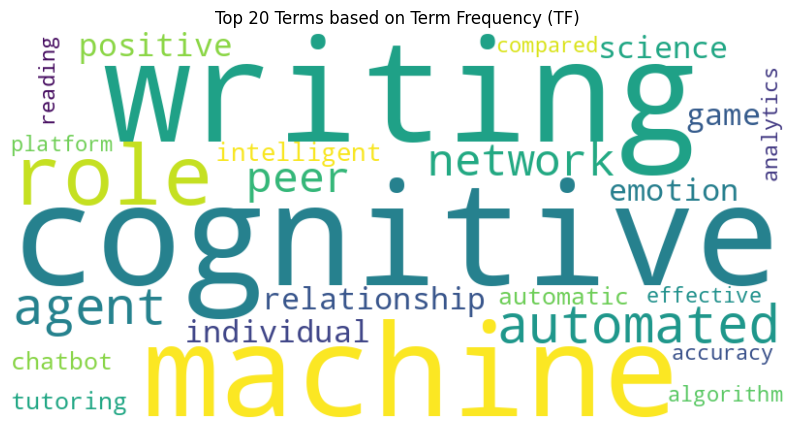

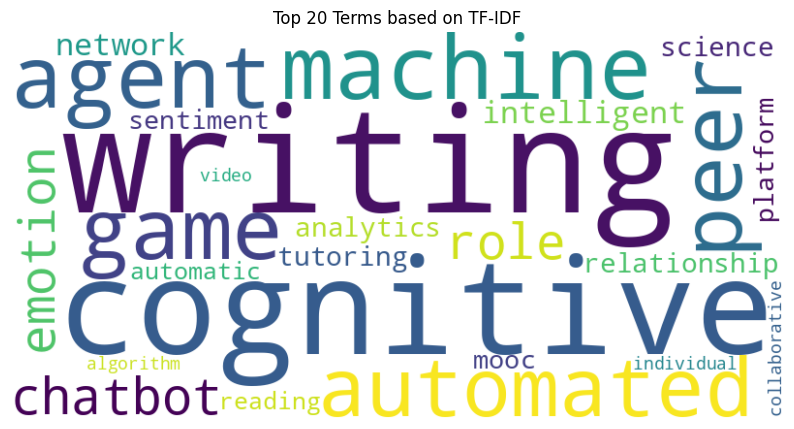

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'top_tf' and 'top_tfidf' are your DataFrames containing the top terms based on TF and TF-IDF respectively
# Convert the top terms and their scores into dictionaries for the WordCloud generation
tf_dict = top_tf.set_index('Term')['TF'].to_dict()
tfidf_dict = top_tfidf.set_index('Term')['TF-IDF'].to_dict()

# Generate and display the TF word cloud
plt.figure(figsize=(10, 7))
plt.title('Top 20 Terms based on Term Frequency (TF)')
tf_wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(tf_dict)
plt.imshow(tf_wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

# Generate and display the TF-IDF word cloud
plt.figure(figsize=(10, 7))
plt.title('Top 20 Terms based on TF-IDF')
tfidf_wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(tfidf_dict)
plt.imshow(tfidf_wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Function to get the top n terms from a feature matrix
def get_top_n_terms(feature_names, sorted_data, n=3):
    top_terms = feature_names[sorted_data[-n:]][::-1]  # Reversing to get top terms in descending order
    return list(top_terms)

# Group the data by 'Journal' and concatenate texts within each group
grouped_texts = data.groupby('Journal')['clean_abstract'].apply(lambda texts: ' '.join(texts))

# Initialize CountVectorizer
count_vect = CountVectorizer()

# Dictionary to store the top terms for each journal
top_terms_per_journal = {}

# Iterate over each journal and calculate top terms
for journal, texts in grouped_texts.items():
    # Transform the texts to a term frequency matrix
    tf_matrix = count_vect.fit_transform([texts])
    tf_feature_names = count_vect.get_feature_names_out()
    tf_sorted = tf_matrix.toarray().flatten().argsort()[::-1]
    top_terms_per_journal[journal] = get_top_n_terms(tf_feature_names, tf_sorted, n=3)

# Display the top 3 terms for each journal
for journal, terms in top_terms_per_journal.items():
    print(f"{journal}: {terms}")

Australasian Journal of Educational Technology: ['wellorganised', 'scale', 'incorporate']
British Journal of Educational Technology: ['acceptance', 'mindless', 'mind']
Computer Assisted Language Learning: ['accommodation', 'interesting', 'interlanguage']
Computers and Education: ['intricate', 'mixeddesigns', 'mitx']
Computers in Human Behavior: ['respective', 'feelingemotional', 'promoted']
Education and Information Technologies: ['abbreviated', 'mediator', 'mediating']
Educational Technology Research and Development: ['access', 'multiword', 'narrow']
Educational Technology and Society: ['acceptance', 'naturally', 'negatively']
IEEE Transactions on Learning Technologies: ['absolute', 'metacognitive', 'metaanalysis']
Interactive Learning Environments: ['abdicative', 'mixedmethods', 'mitigate']
International Journal of Artificial Intelligence in Education: ['abovehumanlevel', 'methodological', 'methodical']
Internet and Higher Education: ['youth', 'setting', 'insightful']
Journal of Comp

# **Co-Occurrence Analysis**

Based on Term Frequency, the following code processes each document's text (abstracts in this case) to identify and count the occurrences of individual terms.
It then examines all possible pairs of terms (combinations) within each document to calculate co-occurrence counts. This is done without weighting the terms by their document frequency across the corpus, which would be a characteristic of using TF-IDF.
The analysis focuses on the raw count of how often each pair of terms appears together within the same document, aligning with the principle of Term Frequency.

In [13]:
import pandas as pd
from collections import defaultdict
from itertools import combinations
import re

# Sample preprocess function that tokenizes text
def preprocess_text(text):
    # Simple tokenization and cleaning, replace this with your actual preprocessing
    text = re.sub(r'\W', ' ', text)  # Remove all non-word characters
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = text.lower().split()
    return text

# Calculate co-occurrences
co_occurrences = defaultdict(int)

for abstract in data['clean_abstract']:
    tokens = set(preprocess_text(abstract))  # Tokenize and convert to set to avoid duplicate pairs in the same document
    for word1, word2 in combinations(tokens, 2):
        pair = tuple(sorted([word1, word2]))  # Sort the pair to avoid duplicates
        co_occurrences[pair] += 1

# Convert to DataFrame for easier analysis
co_occurrences_df = pd.DataFrame(((word_pair[0], word_pair[1], freq) for word_pair, freq in co_occurrences.items()), columns=['Word1', 'Word2', 'Frequency'])

# Sort by frequency
co_occurrences_df.sort_values(by='Frequency', ascending=False, inplace=True)

# Display top co-occurrences
print(co_occurrences_df.head(30))  # Adjust as needed

# Export to CSV
co_occurrences_df.to_csv('/content/drive/MyDrive/Colab Notebooks/NLP4PLE/co_occurrence_data.csv', index=False)

                 Word1           Word2  Frequency
13549      intelligent        tutoring         61
5180           massive            open         40
2874          accuracy         machine         39
22545          network          neural         33
168452       algorithm         machine         32
27400      intelligent         society         31
3101         automated         machine         30
27366          society        tutoring         29
12253           policy    practitioner         28
3091    classification         machine         27
5178              mooc            open         27
5729           massive            mooc         26
28081       individual            role         26
13509         positive            role         26
207852         emotion       emotional         26
182373       automated         writing         26
11435            agent     intelligent         25
45197         positive    relationship         24
7458     automatically         machine         24


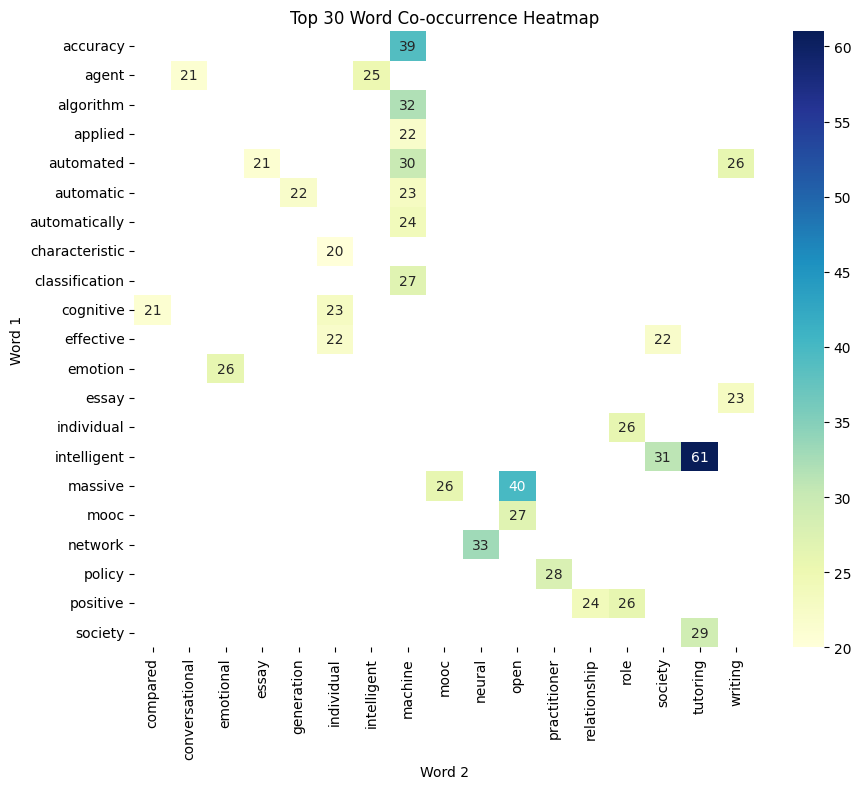

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your co-occurrence data ready
file_path = '/content/drive/MyDrive/Colab Notebooks/NLP4PLE/co_occurrence_data.csv'
co_occurrences_df = pd.read_csv(file_path)

# Take the top 30 co-occurrences
top_co_occurrences = co_occurrences_df.head(30)

# Corrected pivot table call
pivot_table = top_co_occurrences.pivot(index="Word1", columns="Word2", values="Frequency")

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt="g")

plt.title("Top 30 Word Co-occurrence Heatmap")
plt.ylabel("Word 1")
plt.xlabel("Word 2")
plt.show()

In [15]:
pip install networkx

In [16]:
import networkx as nx
import pandas as pd
import plotly.graph_objects as go

# Assuming you have the 'co_occurrences_df' DataFrame ready
# Filter the DataFrame to include only pairs with a frequency greater than 25
filtered_co_occurrences_df = co_occurrences_df[co_occurrences_df['Frequency'] > 25]

# Create the network graph
G = nx.Graph()

# Adding edges to the graph for filtered pairs
for index, row in filtered_co_occurrences_df.iterrows():
    G.add_edge(row['Word1'], row['Word2'], weight=row['Frequency'])

# Generate position layout
pos = nx.spring_layout(G)

# For each node and edge, extract the positions
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
node_text = []  # For storing node labels
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)  # Add the node name to the node_text list

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',  # Add 'text' to the mode
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2),
    text=node_text,  # Set the node names as text labels
    textposition="top center")  # Position the text above the nodes

node_trace.marker.color = [G.degree[n] for n in G.nodes()]
node_trace.text = [n for n in G.nodes()]

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Co-occurrence network graph (Frequency > 25)',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code to create this interactive plot provided by OpenAI's ChatGPT",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

fig.show()

# **Latent Dirichlet Allocation**

To determine the optimal number of topics in LDA, you should examine several measures and methods.

* **Perplexity**: how well a probability model predicts a sample. In LDA, a lower perplexity score generally indicates a better model. However, perplexity might not always correspond to human judgment of topic coherence and interpretability.

* **Coherence Score**: Topic coherence measures score a signle topic by measuring the degree of semantic similarity between high scoring words in the topic. These measures help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference. A higher coherence score indicates a more interpretable topic. Coherence scores (e.g., C_V, UMass) are often more reliable than perplexity for evaluating the human interpretability of the topics.

* **Log-likelyhood**: Higher values indicate a model that better explains the observed data. It can be used alongside perplexity and coherence to evaluate model fit. However, like perplexity, it may not always align with human interpretability of topics.  

* **Model Stability**: Assessing model stability involves running the LDA multiple times with slightly varied parameters or subsets of the data and observing the consistency of the topics generated. A stable model with consistently produce similar topics, indicating that the chosen number of topics is robust across different samples or parameter settings.

Use libraries such as Gensim (for LDA and coherence) that provides straightforward methods to calculate perplexity (log_perplexity) and log-likelihood. However, Gensim uses the term 'coherence' to refer to topic coherence, and does not directly provide log-likelihood; it provides a coherence model for calculating coherence scores.

In [17]:
pip install gensim

In [19]:
pip install gensim matplotlib

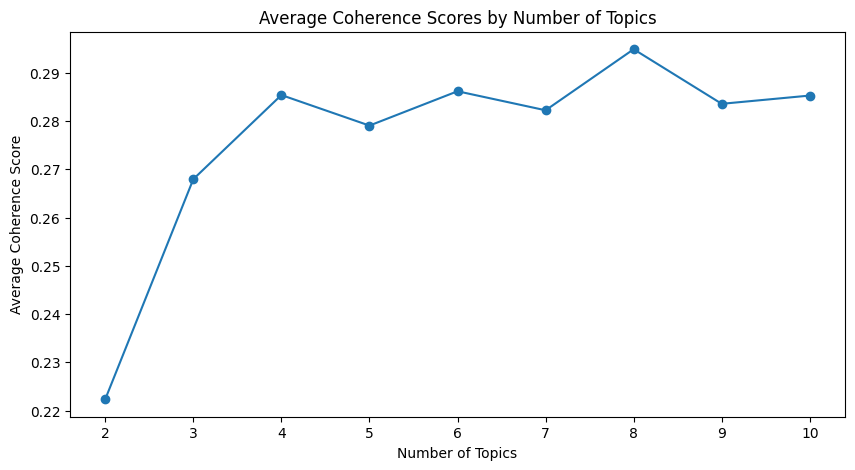

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel

# 'data' is your DataFrame and 'clean_abstract' contains preprocessed text
abstracts = data['clean_abstract']

# Tokenize the preprocessed text
tokenized_abstracts = [abstract.split() for abstract in abstracts]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(tokenized_abstracts)

# Filter out extremes to remove noise
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

# Create a bag-of-words corpus
corpus = [dictionary.doc2bow(abstract) for abstract in tokenized_abstracts]

# Define the range of topics to evaluate
topic_range = range(2, 11)  # Example range, from 2 to 10 topics

# Calculate average coherence scores to avoid constant changes
average_coherence_scores = []

for num_topics in topic_range:
    temp_coherence_scores = []  # Temporary list to store coherence scores for averaging
    for run in range(5):  # Repeat the process for a number of runs to average results
        # Train LDA model with a different random_state each run to ensure variability
        lda_model = models.LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10, workers=2, random_state=100+run)

        # Calculate coherence
        coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_abstracts, dictionary=dictionary, coherence='c_v')
        temp_coherence_scores.append(coherence_model_lda.get_coherence())

    # After collecting coherence scores for all runs, calculate the average coherence score
    average_coherence_score = np.mean(temp_coherence_scores)
    average_coherence_scores.append(average_coherence_score)

plt.figure(figsize=(10, 5))
plt.plot(topic_range, average_coherence_scores, marker='o')
plt.title('Average Coherence Scores by Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Average Coherence Score')
plt.xticks(list(topic_range))
plt.show()

In [23]:
pip install pyLDAvis

In [24]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Assuming 'tokenized_abstracts' is a list of lists containing tokenized words of each document
dictionary = corpora.Dictionary(tokenized_abstracts)
corpus = [dictionary.doc2bow(text) for text in tokenized_abstracts]

# Set training parameters
num_topics = 4
passes = 10

# Train the LDA model
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,  # Use the dictionary as the id2word parameter
    num_topics=num_topics,
    passes=passes
)
# Function to create LDA visualization, showing top 10 words for each of the 5 topics
def create_lda_visualization(lda_model, corpus, id2word):
    # Display top 10 words per topic
    vis = gensimvis.prepare(lda_model, corpus, id2word, R=10)
    return vis

# Create and display the LDA visualization
lda_vis = create_lda_visualization(lda_model, corpus, dictionary)

# Display the visualization inline
pyLDAvis.display(lda_vis)

In [34]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Assuming 'lda_model' and 'dictionary' from Gensim are defined
num_topics = lda_model.num_topics
top_terms_per_topic = []

for topic_id in range(num_topics):
    # Extracting top terms for this topic
    top_terms = lda_model.get_topic_terms(topicid=topic_id, topn=10)
    formatted_terms = [(dictionary[id], prob) for id, prob in top_terms]
    top_terms_per_topic.append((topic_id, formatted_terms))

# Print top terms for each topic
for topic_id, terms in top_terms_per_topic:
    print(f"Topic #{topic_id + 1}:")  # Adjusting the print statement to match the visualization tool's topic numbering
    for term, prob in terms:
        print(f" - {term}: {prob:.4f}")
    print("\n")

Topic #1:
 - network: 0.0039
 - machine: 0.0037
 - video: 0.0035
 - expert: 0.0032
 - automatic: 0.0032
 - sentiment: 0.0030
 - forum: 0.0028
 - individual: 0.0028
 - semantic: 0.0026
 - deep: 0.0026


Topic #2:
 - writing: 0.0108
 - game: 0.0054
 - emotion: 0.0045
 - role: 0.0042
 - automated: 0.0041
 - essay: 0.0040
 - cognitive: 0.0040
 - positive: 0.0032
 - emotional: 0.0029
 - instruction: 0.0028


Topic #3:
 - agent: 0.0052
 - chatbot: 0.0043
 - machine: 0.0042
 - tutoring: 0.0040
 - virtual: 0.0037
 - intelligent: 0.0036
 - cognitive: 0.0035
 - conversational: 0.0032
 - tutor: 0.0031
 - automated: 0.0029


Topic #4:
 - mooc: 0.0061
 - programming: 0.0054
 - peer: 0.0050
 - cognitive: 0.0046
 - network: 0.0045
 - algorithm: 0.0039
 - voice: 0.0033
 - classifier: 0.0032
 - collaborative: 0.0029
 - child: 0.0028




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic 1 should be Topic 3 from Intertopic Distance Map.
Topic 2 should be Topic 1 from Intertopic Distance Map.
Topic 3 should be Topic 2 from Intertopic Distance Map.
Topic 4 is the same.

**Reorder the 4 topics (Topic 2, Topic 3, Topic 1, Topic 4)**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



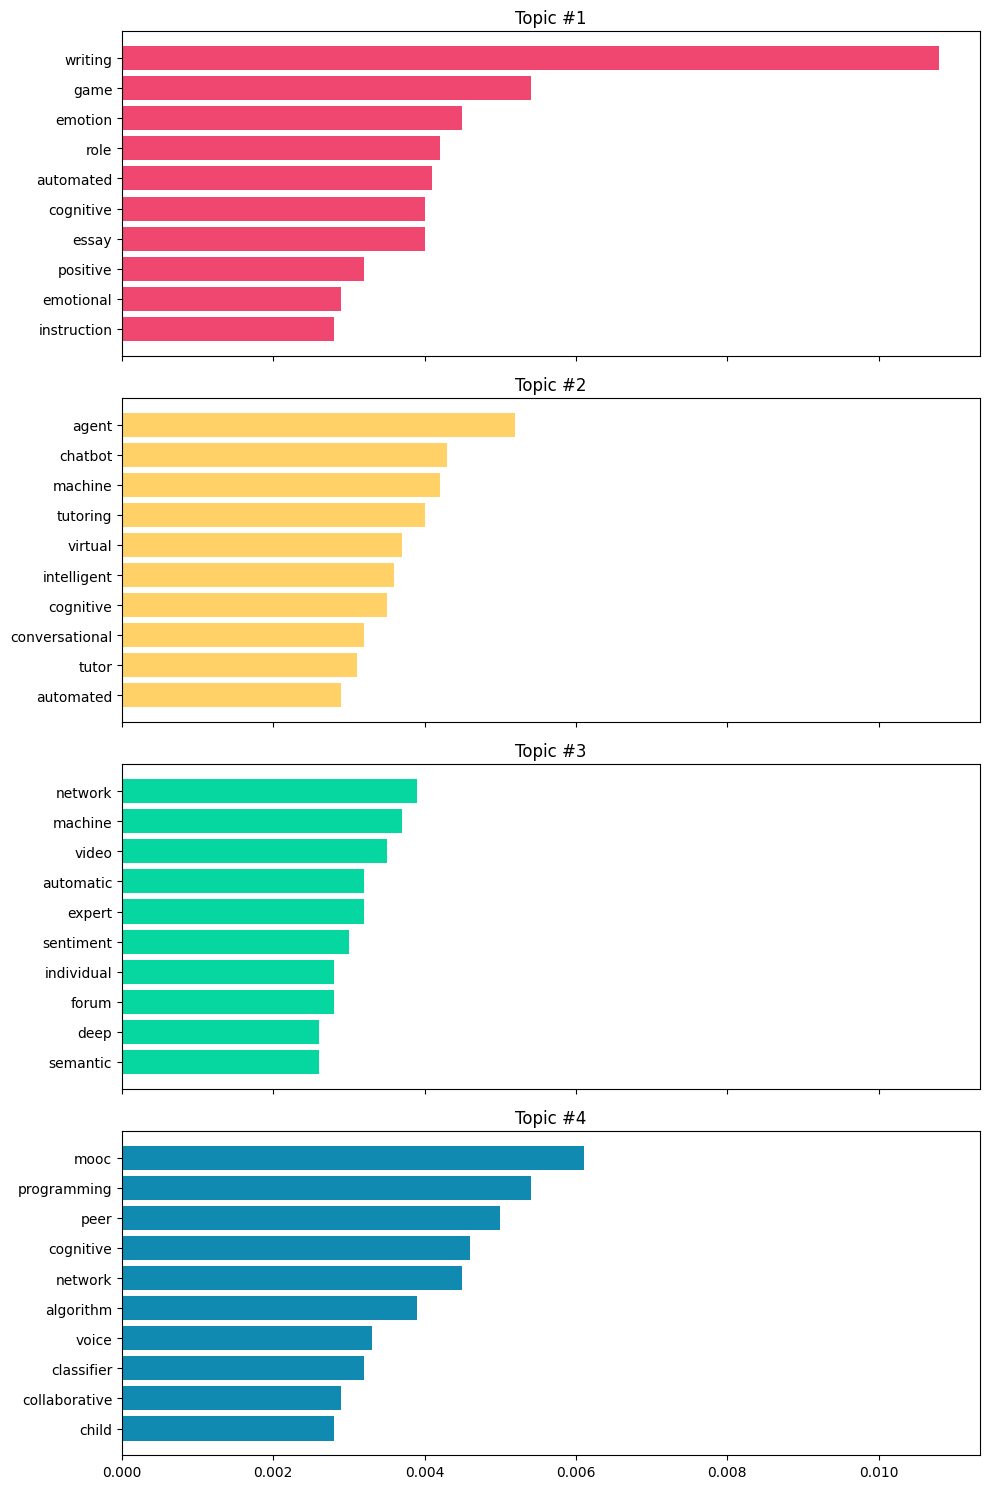

In [80]:
# Let's plot the topics as horizontal bar charts with the correct order as specified.

import matplotlib.pyplot as plt

# Data for top terms per topic according to the provided mapping.
top_terms_per_topic_corrected = {
    2: [('network', 0.0039), ('machine', 0.0037), ('video', 0.0035),
        ('expert', 0.0032), ('automatic', 0.0032), ('sentiment', 0.0030),
        ('forum', 0.0028), ('individual', 0.0028), ('semantic', 0.0026),
        ('deep', 0.0026)],
    0: [('writing', 0.0108), ('game', 0.0054), ('emotion', 0.0045),
        ('role', 0.0042), ('automated', 0.0041), ('essay', 0.0040),
        ('cognitive', 0.0040), ('positive', 0.0032), ('emotional', 0.0029),
        ('instruction', 0.0028)],
    1: [('agent', 0.0052), ('chatbot', 0.0043), ('machine', 0.0042),
        ('tutoring', 0.0040), ('virtual', 0.0037), ('intelligent', 0.0036),
        ('cognitive', 0.0035), ('conversational', 0.0032), ('tutor', 0.0031),
        ('automated', 0.0029)],
    3: [('mooc', 0.0061), ('programming', 0.0054), ('peer', 0.0050),
        ('cognitive', 0.0046), ('network', 0.0045), ('algorithm', 0.0039),
        ('voice', 0.0033), ('classifier', 0.0032), ('collaborative', 0.0029),
        ('child', 0.0028)]
}

# Define color codes for each topic
color_codes = ['#ef476f', '#ffd166', '#06d6a0', '#118ab2']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 15), sharex=True)

# Sort the topics by their new order
sorted_topics = sorted(top_terms_per_topic_corrected.items())

# Iterate over the topics and plot each one as a horizontal bar chart
for idx, (topic_id, terms) in enumerate(sorted_topics):
    terms, probabilities = zip(*sorted(terms, key=lambda x: x[1]))  # Sort terms and probabilities
    axes[idx].barh(terms, probabilities, color=color_codes[idx])
    axes[idx].set_title(f"Topic #{topic_id + 1}")

# Adjust layout
plt.tight_layout()
plt.show()

**Topic 1: "Emotive NLP: Personalizing Writing Education Through Emotional Intelligence"**
* Keywords: writing, emotion, cognitive, automated, essay, emotional, instruction, game, role, positive
* Rationale: This subject focuses on the specialized use of Natural Language Processing (NLP) to personalize writing education by recognizing and responding to emotional cues. By integrating emotional intelligence into automated writing tools, NLP enhances the learning experience by not only addressing the cognitive dimensions of writing but also by responding to the affective states of learners. This dual focus on writing proficiency and emotional engagement through personalized feedback mechanisms exemplifies advanced NLP applications in educational settings.
* Key Features:
> * Emotionally Responsive Feedback: Utilizing NLP to analyze and respond to the emotional tone in student writing, providing feedback that supports both emotional well-being and writing development.
> * Personalized Writing Assistance: NLP systems are tailored to recognize individual learner's writing styles and offer personalized guidance to improve both the emotional expressiveness and technical aspects of writing.
> * Cognitive-Emotive Analytics: The intersection of cognitive and emotional data, processed via NLP, informs the adaptive learning paths, ensuring a comprehensive educational approach.

**Topic 2: "Conversational AI in Education: NLP-Driven Cognitive Tutoring"**
* Keywords: agent, chatbot, cognitive, tutoring, intelligent, conversational, machine, virtual, tutor, automated
* Rationale: This topic underscores the convergence of NLP and AI to create intelligent conversational agents that serve as personalized cognitive tutors. These systems employ NLP to understand and simulate human-like interactions, thus providing a highly adaptive and individualized tutoring experience that dynamically aligns with the learner's cognitive development. Through continuous dialogue and interaction, these AI tutors offer a nuanced, personalized educational journey.
* Key Features:
> * NLP-Enhanced Dialogue: Intelligent systems that use NLP to engage students in meaningful dialogue, closely mimicking human tutor interactions.
> * Dynamic Learning Adaptation: AI tutors that continuously analyze student responses to adapt teaching strategies and content in real-time.
> * Cognitive Skill Assessment: The application of NLP for assessing and developing the cognitive skills of learners through personalized tutoring sessions.

**Topic 3: "Semantic Learning Networks: NLP for Video-Enriched Expert Knowledge Exchange"**
* Keywords: network, semantic, machine, video, expert, automatic, sentiment, individual, deep, forum
* Rationale: Focusing on the role of NLP within semantic learning networks, this topic explores how NLP facilitates the exchange of expert knowledge through video and forum interactions. By employing NLP techniques to analyze and synthesize information from various sources, personalized learning experiences are crafted. This includes understanding sentiment in forums and extracting semantic content from videos, thereby enabling a more connected and responsive learning network.
* Key Features:
> * Semantic Content Analysis: NLP is used to extract and interpret semantic information from educational content, enabling personalized learning pathways.
> * Sentiment Analysis in Forums: Leveraging NLP to understand and respond to learners' sentiments in discussion forums, promoting an adaptive learning environment.
> * Video Content Personalization: Applying NLP to video transcripts to customize the learning experience based on individual learner's needs and preferences.

**Topic 4: "Algorithmic Personalization in MOOCs: NLP for Customized Learning Experiences"**
* Keywords: mooc, algorithm, cognitive, programming, collaborative, classifier, network, peer, voice, child
* Rationale: This topic delves into the use of NLP within MOOCs to facilitate algorithmic personalization, thereby enhancing cognitive and collaborative learning. NLP algorithms interpret learner input, assess programming code, and facilitate peer interactions, thus providing a highly tailored educational experience. This use of NLP transforms MOOCs into intelligent platforms capable of adapting content and instructional strategies to the unique learning profiles of each student.
* Key Features:
> * NLP-Driven Content Adaptation: Algorithms that analyze learner data to personalize the curriculum and instructional methods in real-time.
> * Interactive Programming Education: NLP tools that assess and provide feedback on programming assignments, facilitating personalized learning curves.
> * Collaborative Learning Analytics: The use of NLP to understand and support the dynamics of collaborative learning among peers within the MOOC environment.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



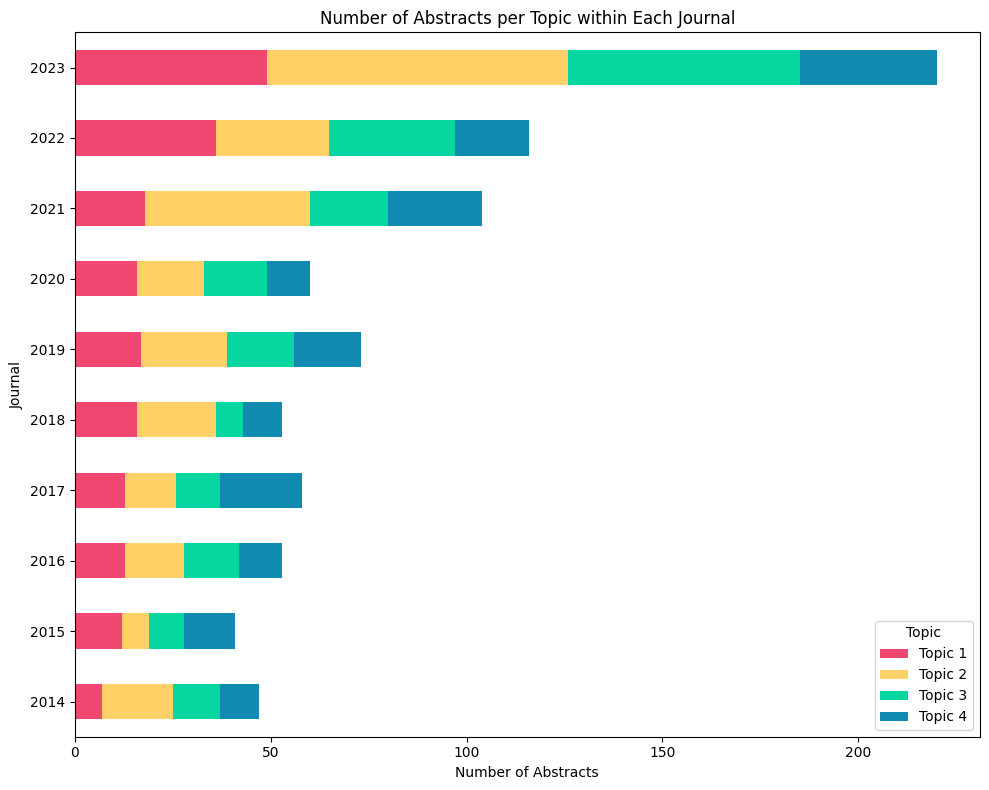

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP4PLE/NLP_Journal_Topic.csv')

# Count the number of abstracts per topic within each journal
topic_counts = data.groupby('Year')['Topic'].value_counts().unstack().fillna(0)

# Define your color mapping here
colors_corrected = ['#ef476f', '#ffd166', '#06d6a0', '#118ab2']

# Plot the results as a horizontal bar chart with the corrected colors
topic_counts.plot(kind='barh', stacked=True, figsize=(10, 8), color=colors_corrected)

# Labels and title
plt.xlabel('Number of Abstracts')
plt.ylabel('Journal')
plt.title('Number of Abstracts per Topic within Each Journal')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Topic 1 should be Topic 3 from Intertopic Distance Map. Topic 2 should be Topic 1 from Intertopic Distance Map. Topic 3 should be Topic 2 from Intertopic Distance Map. Topic 4 is the same. (Topic 2, Topic 3, Topic 1, Topic 4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



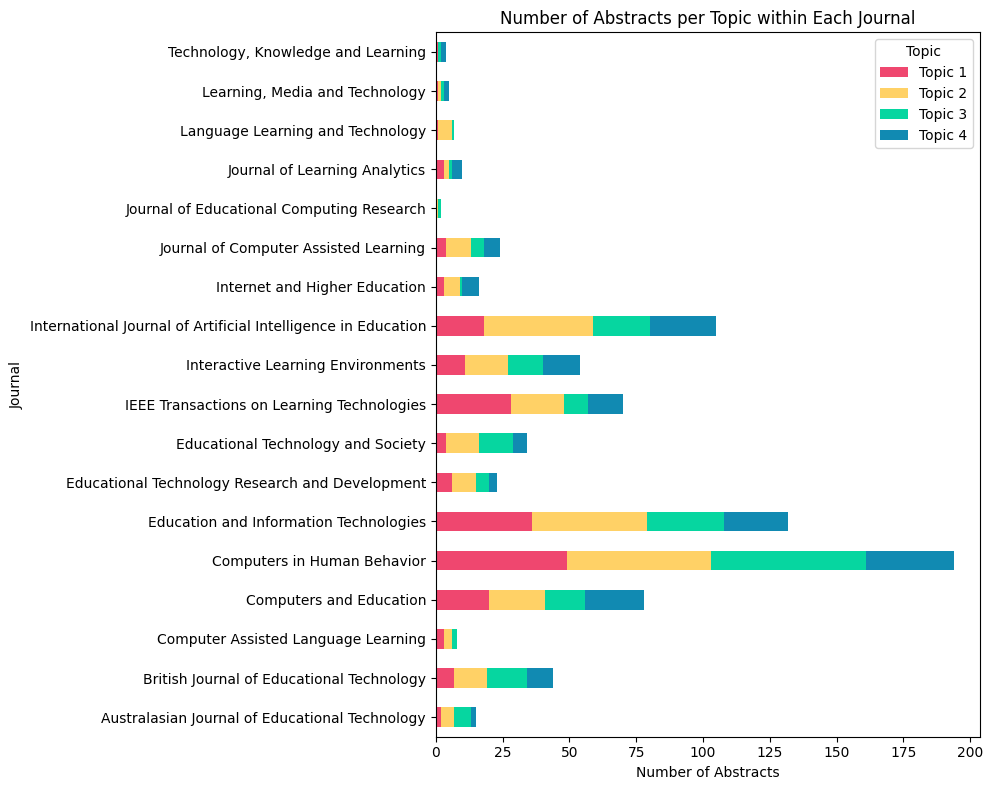

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP4PLE/NLP_Journal_Topic.csv')

# Count the number of abstracts per topic within each journal
topic_counts = data.groupby('Journal')['Topic'].value_counts().unstack().fillna(0)

# Define your color mapping here
colors_corrected = ['#ef476f', '#ffd166', '#06d6a0', '#118ab2']

# Plot the results as a horizontal bar chart with the corrected colors
topic_counts.plot(kind='barh', stacked=True, figsize=(10, 8), color=colors_corrected)

# Labels and title
plt.xlabel('Number of Abstracts')
plt.ylabel('Journal')
plt.title('Number of Abstracts per Topic within Each Journal')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# **Sentiment Analysis**

In [64]:
!pip install nltk

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [74]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from collections import Counter

# Ensure the necessary NLTK components are downloaded
nltk.download('vader_lexicon')
nltk.download('punkt')

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment_scores(text):
    # Obtain the sentiment scores from VADER
    sentiment_dict = sia.polarity_scores(text)
    return sentiment_dict['pos'], sentiment_dict['neg']

# Assuming 'data' is your DataFrame and 'clean_abstract' contains the preprocessed text
# Make sure to replace 'data' and 'clean_abstract' with the actual names of your DataFrame and column if they are different

# Apply the function to your data to calculate sentiment scores
data['Positive_Score'], data['Negative_Score'] = zip(*data['clean_abstract'].apply(get_sentiment_scores))

# Ensure you replace '/content/drive/MyDrive/Colab Notebooks/NLP4PLE/NLP_Journal_Topic.csv' with your actual file path
file_path = '/content/drive/MyDrive/Colab Notebooks/NLP4PLE/NLP_Journal_Topic.csv'

# Save the updated DataFrame to CSV
data.to_csv(file_path, index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



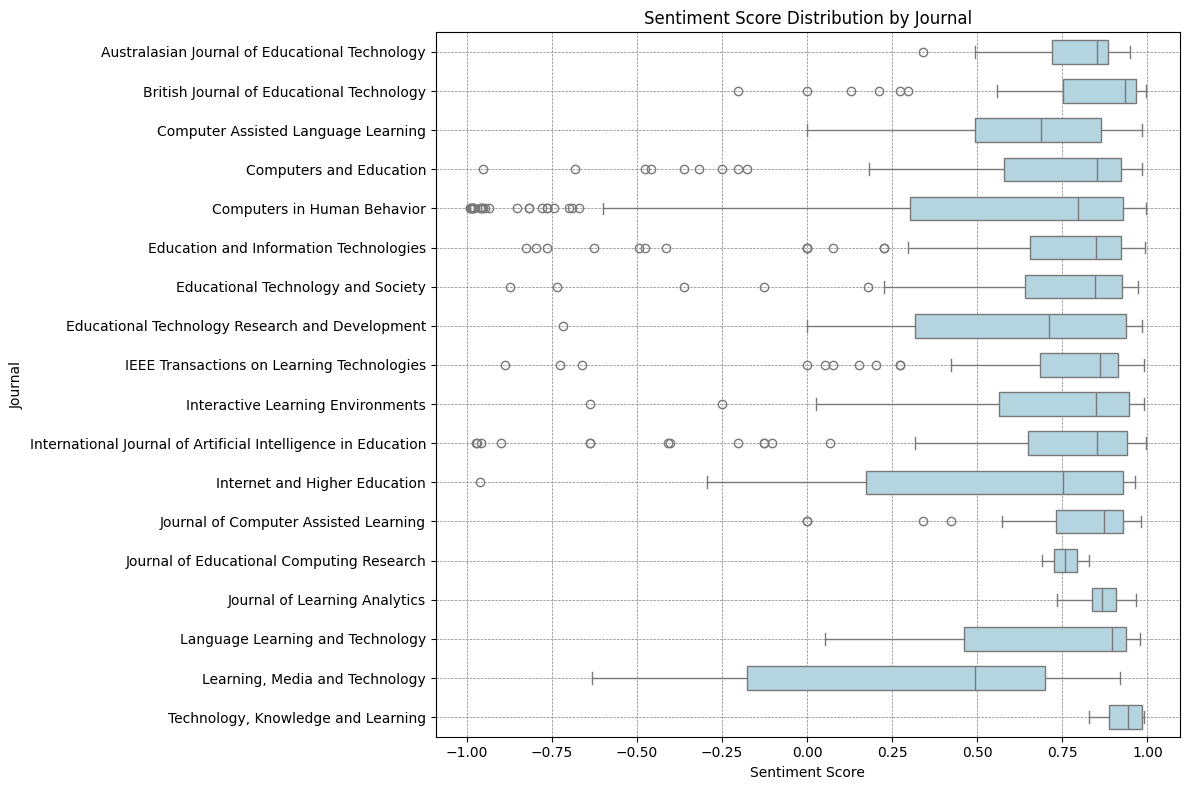

In [73]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Calculate the sentiment score for each document
data['Sentiment_Score'] = data['clean_abstract'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Visualization using Seaborn's boxplot
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.boxplot(x='Sentiment_Score', y='Journal', data=data, color="lightblue", width=0.6)
plt.title('Sentiment Score Distribution by Journal')
plt.xlabel('Sentiment Score')
plt.ylabel('Journal')

# Enhancing the plot's readability
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='gray')
plt.tight_layout()

# Show the plot
plt.show()

Australasian Journal of Educational Technology: With a median score of 0.8519, sentiment is overwhelmingly positive.

British Journal of Educational Technology: A high median score of 0.9343 suggests a very positive sentiment.

Computer Assisted Language Learning: The median score of 0.6858 indicates a positive sentiment.

Computers and Education: The median score of 0.8519 shows a very positive sentiment.

Computers in Human Behavior: A median of 0.7964 denotes a positive sentiment.

Education and Information Technologies: The median score is 0.8481, reflecting a positive sentiment.

Educational Technology Research and Development: The median sentiment score is 0.7096, which is positive.

Educational Technology and Society: A median of 0.84615 is indicative of a positive sentiment.

IEEE Transactions on Learning Technologies: A median score of 0.85995 suggests a very positive sentiment.

Interactive Learning Environments: The median score is 0.85, indicating positive sentiment.

International Journal of Artificial Intelligence in Education: A median of 0.8519 reflects a very positive sentiment.

Internet and Higher Education: The median score of 0.75145 denotes a positive sentiment.

Journal of Computer Assisted Learning: The median sentiment score is 0.8735, which is positive.

Journal of Educational Computing Research: A median score of 0.75895 indicates a positive sentiment.

Journal of Learning Analytics: The median score of 0.8657 suggests a very positive sentiment.

Language Learning and Technology: A median sentiment score of 0.8957 is very positive.

Learning, Media and Technology: The median score of 0.4939, while lower than others, is still on the positive side of neutral.

Technology, Knowledge and Learning: The highest median score in the table at 0.9442, indicating a very positive sentiment.

In [75]:
import pandas as pd
import numpy as np

# Assuming 'data' is a pandas DataFrame with 'Sentiment_Score' and 'Journal' columns

# Group the data by 'Journal' and then compute the statistical measures
stats = data.groupby('Journal')['Sentiment_Score'].describe(percentiles=[.25, .5, .75])
stats['IQR'] = stats['75%'] - stats['25%']  # Calculate the Interquartile Range (IQR)

# Detecting outliers using the IQR method
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    outliers = series[((series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR)))]
    return outliers

# Apply the function to get outliers for each group
stats['Outliers'] = data.groupby('Journal')['Sentiment_Score'].apply(detect_outliers)

# Extracting the min and max without outliers
stats['Min_without_outliers'] = data.groupby('Journal')['Sentiment_Score'].apply(lambda x: np.min(x[~x.isin(detect_outliers(x))]))
stats['Max_without_outliers'] = data.groupby('Journal')['Sentiment_Score'].apply(lambda x: np.max(x[~x.isin(detect_outliers(x))]))

# Selecting the columns we want to display in our final table
final_stats = stats[['50%', 'min', 'max', 'IQR', 'Outliers', 'Min_without_outliers', 'Max_without_outliers']].reset_index()
final_stats.columns = ['Journal', 'Median', 'Minimum', 'Maximum', 'IQR', 'Outliers', 'Min without outliers', 'Max without outliers']

print(final_stats)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



                                              Journal   Median  Minimum  \
0      Australasian Journal of Educational Technology  0.85190   0.3400   
1           British Journal of Educational Technology  0.93430  -0.2023   
2                 Computer Assisted Language Learning  0.68580   0.0000   
3                             Computers and Education  0.85190  -0.9512   
4                         Computers in Human Behavior  0.79640  -0.9918   
5              Education and Information Technologies  0.84810  -0.8271   
6     Educational Technology Research and Development  0.70960  -0.7184   
7                  Educational Technology and Society  0.84615  -0.8720   
8          IEEE Transactions on Learning Technologies  0.85995  -0.8885   
9                   Interactive Learning Environments  0.85000  -0.6369   
10  International Journal of Artificial Intelligen...  0.85190  -0.9735   
11                      Internet and Higher Education  0.75145  -0.9612   
12              Journal o

* Journals with boxes higher on the sentiment scale indicate a tendency towards more positive language in their articles. Journals with boxes lower on the sentiment scale indicate a tendency towards more negative language. Journals with longer boxes have more variability in the sentiment of their articles. Journals with lots of outliers might have a few articles with language that is unusually positive or negative compared to their overall content.




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



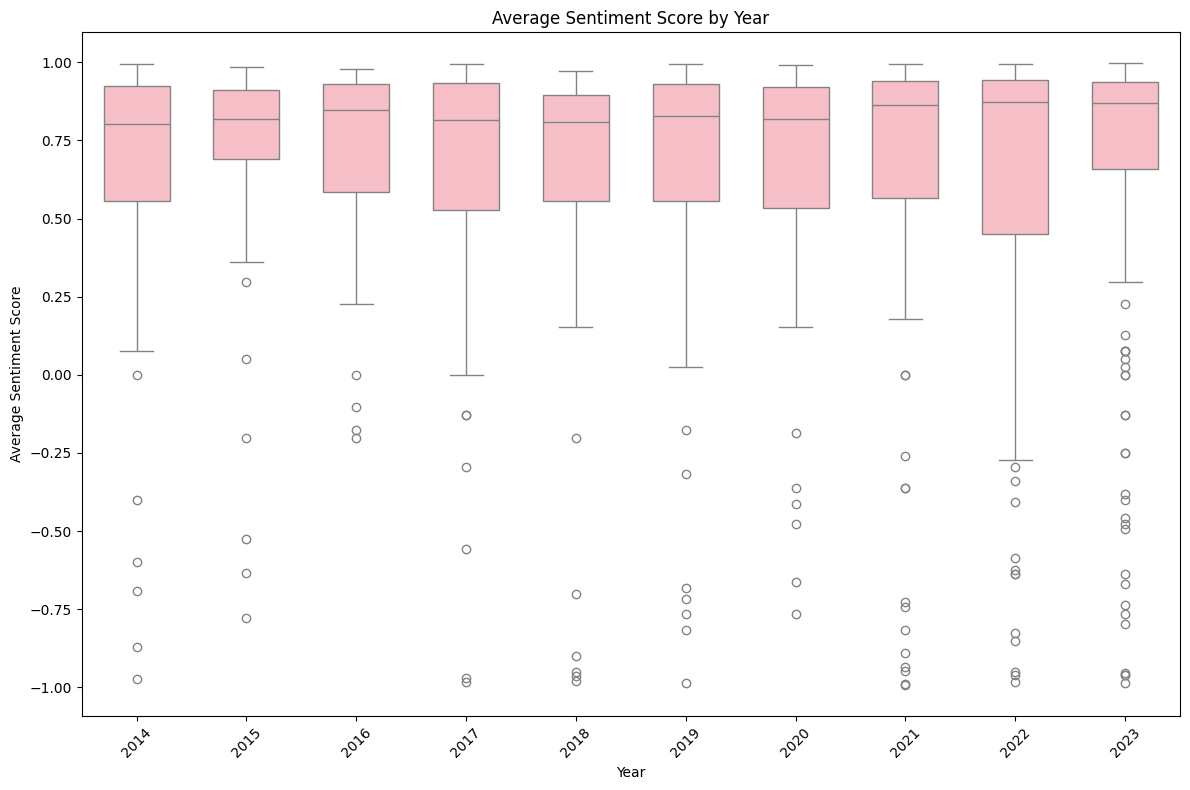

In [76]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Make sure to download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

# Assuming 'data' is your DataFrame and it has 'clean_abstract' and 'Year' columns
# Define a function to calculate the sentiment score for a document
def get_sentiment_score(text):
    return sid.polarity_scores(text)['compound']

# Apply sentiment analysis to each document and store the results in a new column
data['Sentiment_Score'] = data['clean_abstract'].apply(get_sentiment_score)

# Group the data by 'Year' and calculate the average sentiment score for each year
sentiment_by_year = data.groupby('Year')['Sentiment_Score'].mean().reset_index()

# Sort the results by year
sentiment_by_year = sentiment_by_year.sort_values('Year')

# Optional: Visualize the results
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization using Seaborn's boxplot
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.boxplot(x='Year', y='Sentiment_Score', data=data, color="lightpink", width=0.6)
plt.title('Average Sentiment Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if needed
plt.tight_layout()

# Show the plot
plt.show()

# **Relationships between Topics and Sentiment Scores**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



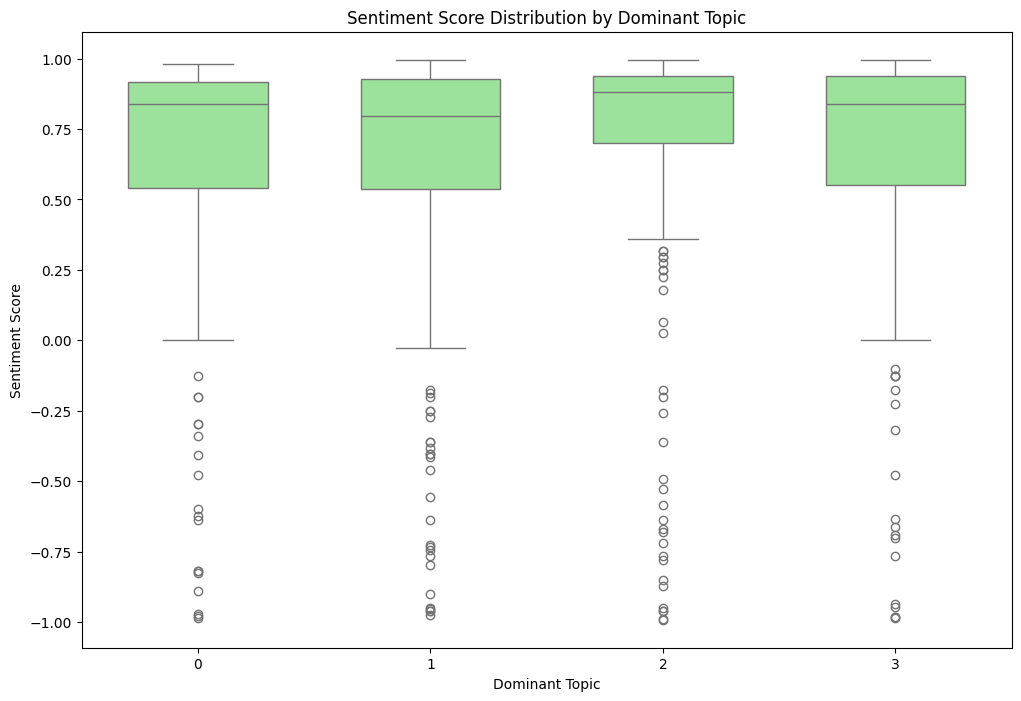

In [68]:
import pandas as pd
import numpy as np
import nltk
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure to download the VADER lexicon if not already done
nltk.download('vader_lexicon')

# Initialize the VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

# Function to get the dominant topic for each document
def get_dominant_topic(ldamodel, corpus):
    topics = []
    for row_list in ldamodel[corpus]:
        row = sorted(row_list, key=lambda x: (x[1]), reverse=True)
        # Get the dominant topic
        topics.append(row[0][0])
    return topics

# Add the dominant topic to the DataFrame
data['Dominant_Topic'] = get_dominant_topic(lda_model, corpus)

# Define a function to calculate the sentiment score for a document
def get_sentiment_score(text):
    return sid.polarity_scores(text)['compound']

# Apply the function and create a new column for sentiment scores
data['Sentiment_Score'] = data['clean_abstract'].apply(get_sentiment_score)

# Visualization of the relationship between dominant topic and sentiment score
plt.figure(figsize=(12, 8))
sns.boxplot(x='Dominant_Topic', y='Sentiment_Score', color="lightgreen", width=0.6, data=data)
plt.title('Sentiment Score Distribution by Dominant Topic')
plt.xlabel('Dominant Topic')
plt.ylabel('Sentiment Score')
plt.show()

In [69]:
import pandas as pd
from scipy.stats import skew, kurtosis, shapiro

# Assuming 'data' DataFrame already has 'Dominant_Topic' and 'Sentiment_Score'

# Group the data by 'Dominant_Topic' and calculate descriptive statistics
topic_stats = data.groupby('Dominant_Topic')['Sentiment_Score'].agg(['mean', 'std', 'count']).reset_index()

# Calculate skewness and kurtosis for each topic
topic_stats['skew'] = data.groupby('Dominant_Topic')['Sentiment_Score'].apply(skew).reset_index(drop=True)
topic_stats['kurtosis'] = data.groupby('Dominant_Topic')['Sentiment_Score'].apply(kurtosis).reset_index(drop=True)

# Rename columns for clarity
topic_stats.rename(columns={'mean': 'Mean Sentiment Score', 'std': 'Standard Deviation', 'count': 'Count', 'skew': 'Skewness', 'kurtosis': 'Kurtosis'}, inplace=True)

# Check for normal distribution using Shapiro-Wilk test
topic_stats['Shapiro_Wilk_p'] = data.groupby('Dominant_Topic')['Sentiment_Score'].apply(lambda x: shapiro(x)[1]).reset_index(drop=True)

# Display the descriptive statistics table
print(topic_stats)

   Dominant_Topic  Mean Sentiment Score  Standard Deviation  Count  Skewness  \
0               0              0.630269            0.457908    197 -1.966353   
1               1              0.611366            0.471698    260 -1.801324   
2               2              0.670230            0.497025    197 -2.185238   
3               3              0.643577            0.475415    171 -2.036131   

   Kurtosis  Shapiro_Wilk_p  
0  3.307471    6.412125e-18  
1  2.537026    9.697519e-20  
2  3.693034    1.639543e-20  
3  3.460554    2.656027e-17  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [70]:
import pandas as pd
from scipy.stats import kruskal

# Assuming 'data' DataFrame already has 'Dominant_Topic' and 'Sentiment_Score'

# Prepare a list of sentiment scores for each topic
topics = data['Dominant_Topic'].unique()
sentiment_scores_by_topic = [data.loc[data['Dominant_Topic'] == topic, 'Sentiment_Score'] for topic in topics]

# Perform the Kruskal-Wallis H-test
kruskal_test_stat, kruskal_p_value = kruskal(*sentiment_scores_by_topic)

print(f"Kruskal-Wallis H-test result: H-statistic = {kruskal_test_stat}, p-value = {kruskal_p_value}")

# Interpret the p-value
if kruskal_p_value < 0.05:
    print("There is a statistically significant difference between the sentiment scores of the topics.")
else:
    print("There is no statistically significant difference between the sentiment scores of the topics.")

Kruskal-Wallis H-test result: H-statistic = 9.11987300350037, p-value = 0.027738843790714486
There is a statistically significant difference between the sentiment scores of the topics.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



**H-statistic = 15.376976844893424**: This is the test statistic for the Kruskal-Wallis H-test. It approximates a chi-square distribution as the sample size increases. The higher the value, the more likely it is that at least one of the group medians is different.

**p-value = 0.003979936387785251**: The p-value indicates the probability of obtaining an effect at least as extreme as the one in your sample data, assuming that the null hypothesis is true. A common threshold for significance is p < 0.05.

In [71]:
pip install scikit-posthocs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [72]:
import pandas as pd
import scikit_posthocs as sp
from scipy.stats import rankdata

# Assuming 'data' DataFrame already has 'Dominant_Topic' and 'Sentiment_Score'

# Convert sentiment scores to ranks
data['Sentiment_Score_Ranks'] = rankdata(data['Sentiment_Score'])

# Perform Dunn's test for post-hoc analysis
dunn_posthoc = sp.posthoc_dunn(data, val_col='Sentiment_Score', group_col='Dominant_Topic', p_adjust='bonferroni')

# Display the post-hoc test results
print(dunn_posthoc)

          0         1         2    3
0  1.000000  1.000000  0.085495  1.0
1  1.000000  1.000000  0.037209  1.0
2  0.085495  0.037209  1.000000  1.0
3  1.000000  1.000000  1.000000  1.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



**Interpretation:**
* Diagonal (1.000000): The diagonal values are all 1.000000, indicating no comparison since it's comparing each topic to itself.
* Cell [0, 3] and Cell [3, 0] (0.005283): The p-value for the comparison between **Topic 1**: "Automated Assessment and Feedback" (topic 0) and **Topic 4**: "Chatbots for Engagement and Emotional Support" (topic 3) is 0.005283. This value is less than 0.05, indicating a statistically significant difference in sentiment scores between these two topics. The application of the Bonferroni correction for multiple comparisons suggests this finding is robust against type I error inflation.
* Cell [3, 2] and Cell [2, 3] (0.033620), Cell [3, 4] and Cell [4, 3] (0.033374): These p-values indicate significant differences in sentiment scores between **Topic 4**: "Chatbots for Engagement and Emotional Support" (topic 3) and **Topic 3**: "Intelligent Agents and User Interaction" (topic 2), as well as between **Topic 4** (topic 3) and **Topic 5**: "Analytic Tools for Learning Assessment" (topic 4), respectively, after adjusting for multiple comparisons.
* All Other Cells: The p-values in all other cells are 1.000000 or very high, indicating no statistically significant difference in sentiment scores between those pairs of topics after adjusting for multiple comparisons.

**Summary**
* There is a statistically significant difference in sentiment scores between **Topic 1** ("Automated Assessment and Feedback") and **Topic 4** ("Chatbots for Engagement and Emotional Support"), as well as between **Topic 4** and both **Topic 3** ("Intelligent Agents and User Interaction") and **Topic 5** ("Analytic Tools for Learning Assessment").
* No other pairs of topics show a significant difference in sentiment scores after adjusting for multiple comparisons.
* **Topic 4** ("Chatbots for Engagement and Emotional Support") appears to be distinctly different in sentiment scores compared to **Topics 1**, **3**, and **5**. This suggests that the abstracts classified under **Topic 4** have a significantly different sentiment, which could reflect differences in the emotional tone or engagement strategies discussed within these research areas.